In [4]:
import numpy as np

In [5]:
data = np.genfromtxt('./ASTR19_F24_group_project_data.txt', dtype=[('day', 'i8'), ('time', 'U6'), ('height', 'f8')])

#empty lists to be filled with column data
day = []
time = []
height = []

for i in range(82):
    #assign first, second and third columns to day, time, and height
    day.append(data[i][0])
    time.append(data[i][1])
    height.append(data[i][2])
    
print(day)
print('')
print(time)
print('')
print(height)

[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 26, 26, 27, 27, 28, 28, 29, 29, 30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41]

['8:07', '15:37', '8:55', '16:25', '9:45', '17:14', '10:35', '18:00', '11:28', '18:46', '12:22', '19:31', '13:24', '20:16', '3:22', '21:01', '4:07', '21:46', '4:50', '11:58', '5:31', '12:56', '6:08', '13:45', '6:47', '14:25', '7:22', '15:00', '7:59', '15:34', '8:34', '16:08', '9:10', '16:41', '9:45', '17:12', '10:21', '17:45', '10:57', '18:15', '11:38', '18:48', '12:25', '19:20', '2:22', '19:52', '2:58', '20:30', '3:37', '10:44', '4:23', '11:55', '5:15', '12:57', '6:09', '13:50', '7:05', '14:39', '7:58', '15:27', '8:50', '16:10', '9:40', '16:52', '10:30', '17:34', '11:19', '18:12', '12:10', '18:49', '1:32', '19:24', '2:13', '20:00', '2:54', '9:54', '3:39', '11:15', '4:29', '12:22

In [6]:
percents = []
for times in time:
    hourmin = times.split(':')
    percent = (float(hourmin[0]) + float(hourmin[1])/60) /24
    percents.append(percent)
daytime = [percent + daynum for percent, daynum in zip(percents, day)]

In [7]:
import matplotlib.pyplot as plt

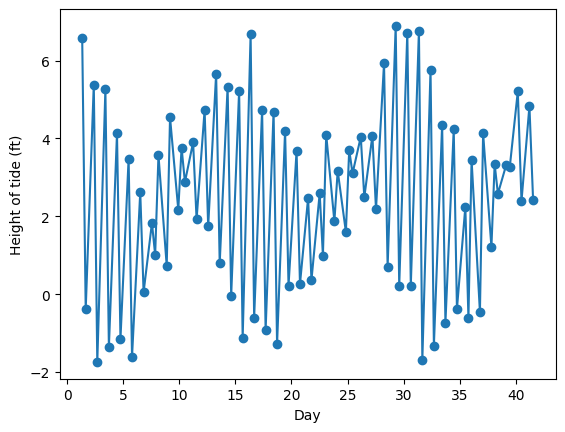

In [8]:
plt.plot(daytime, height, '-o')
plt.xlabel('Day')
plt.ylabel('Height of tide (ft)')
plt.show()

In [9]:
from scipy import optimize

In [51]:
def f_line(x, a, b, c, d):
    return a * np.sin(b * x) * np.sin(c * x) + d

print(np.max(height) - np.min(height))
params, params_cov = optimize.curve_fit(f_line, daytime, height, sigma=np.full(len(daytime), 0.25), p0=[abs(np.max(height) - np.min(height)),np.pi/15,2*np.pi,np.mean(height)])

a_fit = params[0]
b_fit = params[1]
c_fit = params[2]
d_fit = params[3]

print(a_fit, b_fit, c_fit, d_fit)

height_fit = f_line(np.array(daytime), a_fit, b_fit, c_fit, d_fit)
print(height_fit)

8.629999999999999
1.4888781327659748 0.2301389008990457 6.281434421940558 2.4972777864745654
[2.88161133 2.05014039 3.05777486 1.70964525 3.08651156 1.39720933
 2.96686439 1.17507491 2.70806011 1.07731142 2.37181054 1.11746787
 1.98946276 1.28572078 3.58093943 1.54909777 3.61239269 1.85739153
 3.50394003 2.5240532  3.27617077 2.3426876  2.96715866 2.34284346
 2.62121823 2.48744791 2.28560655 2.72526123 2.00205684 3.01739384
 1.80241819 3.32603806 1.71092755 3.60817082 1.7271384  3.82579016
 1.84756644 3.95747512 2.0420867  3.98234486 2.30425703 3.89849082
 2.58968187 3.71663261 1.82634235 3.45992736 1.83083398 3.14844907
 1.94199455 2.27086651 2.15901744 2.47858133 2.46969569 2.48105368
 2.82170889 2.31782919 3.13890156 2.04560398 3.35330525 1.71960606
 3.42415798 1.41553112 3.34741126 1.17506514 3.13839578 1.03656054
 2.84899846 1.0241339  2.52349343 1.13109275 2.94311253 1.33794484
 3.0667558  1.6185903  3.07382469 2.97268316 2.96194981 2.62808537
 2.73030749 2.49353031 2.40740668 2.

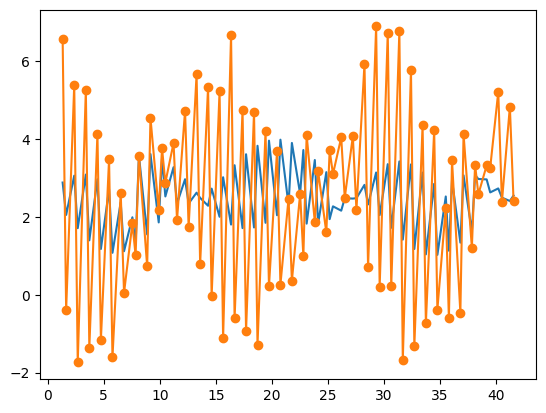

In [52]:
plt.plot(daytime, height_fit)
plt.plot(daytime, height, '-o')
plt.show()